## 1. Import Libraries

In [53]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sb

# import warnings library to ignore warnings
import warnings
warnings.simplefilter(action="ignore", category=Warning) # Ignore warnings

#configuration for seaborn
sb.set(style='ticks')
sb.set_palette('Paired')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix
import pickle

## 2. Load Data

In [54]:
#Load Data
raw_data = pd.read_csv('./Crop_Recommendation.csv')
raw_data

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.880,82.003,6.503,202.936,Rice
1,85,58,41,21.770,80.320,7.038,226.656,Rice
2,60,55,44,23.004,82.321,7.840,263.964,Rice
3,74,35,40,26.491,80.158,6.980,242.864,Rice
4,78,42,42,20.130,81.605,7.628,262.717,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.775,66.413,6.780,177.775,Coffee
2196,99,15,27,27.417,56.636,6.087,127.925,Coffee
2197,118,33,30,24.132,67.225,6.363,173.323,Coffee
2198,117,32,34,26.272,52.127,6.759,127.175,Coffee


In [55]:
#copy raw_data to new variable df
df = raw_data.copy()

#### 2.1 Data Overview

In [56]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.880,82.003,6.503,202.936,Rice
1,85,58,41,21.770,80.320,7.038,226.656,Rice
2,60,55,44,23.004,82.321,7.840,263.964,Rice
3,74,35,40,26.491,80.158,6.980,242.864,Rice
4,78,42,42,20.130,81.605,7.628,262.717,Rice


In [57]:
df.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2195,107,34,32,26.775,66.413,6.780,177.775,Coffee
2196,99,15,27,27.417,56.636,6.087,127.925,Coffee
2197,118,33,30,24.132,67.225,6.363,173.323,Coffee
2198,117,32,34,26.272,52.127,6.759,127.175,Coffee
2199,104,18,30,23.603,60.396,6.780,140.937,Coffee


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [59]:
df.describe(include='all')

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
count,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.552,53.363,48.149,25.616,71.482,6.469,103.464,NaN
std,36.917,32.986,50.648,5.064,22.264,0.774,54.958,NaN
min,0.000,5.000,5.000,8.826,14.258,3.505,20.211,NaN
25%,21.000,28.000,20.000,22.769,60.262,5.972,64.552,NaN
50%,37.000,51.000,32.000,25.599,80.473,6.425,94.868,NaN
75%,84.250,68.000,49.000,28.562,89.949,6.924,124.268,NaN


## 3. Sanity checks
1. Check missing values
2. Check for duplicates
3. Check for data types
4. Check for number of unique values of each column
5. Check for statistics of dataset
6. Check for various categories present in the categorical columns

#### 3.1 Checking for missing values

In [60]:
# Checking for missing values
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

##### Obeservation: There are no columns with null values

#### 3.2 Checking for duplicates

In [61]:
df.duplicated().sum()

0

##### Observation: There are no duplicates

#### 3.3 Checking for data types

In [62]:
df.dtypes

Nitrogen         int64
Phosphorus       int64
Potassium        int64
Temperature    float64
Humidity       float64
pH_Value       float64
Rainfall       float64
Crop            object
dtype: object

In [63]:
features = df.columns[:-1]
features

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object')

In [64]:
target = 'Crop'

#### 3.4 Checking the number of unique values in each column

In [65]:
df.nunique()

Nitrogen        137
Phosphorus      117
Potassium        73
Temperature    2200
Humidity       2200
pH_Value       2200
Rainfall       2200
Crop             22
dtype: int64

##### Observation: There is no column to be dropped off due to single unique value.

#### 3.5 Summary Statistics

In [66]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000
mean,50.552,53.363,48.149,25.616,71.482,6.469,103.464
std,36.917,32.986,50.648,5.064,22.264,0.774,54.958
min,0.000,5.000,5.000,8.826,14.258,3.505,20.211
25%,21.000,28.000,20.000,22.769,60.262,5.972,64.552
50%,37.000,51.000,32.000,25.599,80.473,6.425,94.868
75%,84.250,68.000,49.000,28.562,89.949,6.924,124.268
max,140.000,145.000,205.000,43.675,99.982,9.935,298.560


## 4  Exploratory Data Analysis(EDA) and Visualization

#### 4.1 Univairate Analysis

##### 4.1.1 Categorical Columns

In [67]:
def plot_counts(data, features, hue=None):
    """
    This function takes the name of the feature and plots the distribution
    of the categorical values and saves the figure for future usage using
    countplot function of seaborn

    ---
    ### Parameters:
    - data <dataframe>: tabular data in data frame format
    - features <list>: List of categorical columns in dataframe to be visualized
    - hue <string>: Name of the hue
    """
    # set the number of rows and columns for the subplots
    n_cols = 2
    n_rows = int(np.ceil(len(features)/n_cols))
    fig, axes = plt.subplots(n_rows,n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()
   
    for i, feature in enumerate(features):
        sb.countplot(
            data=data,
            x=feature,
            palette='Paired',
            hue=hue,
            ax=axes[i]
        )
        
        #Display count of each level of category
        for p in axes[i].patches:
            label = p.get_height()
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()

            rotation = 0
            if hue is not None:
                rotation = 30

            axes[i].annotate(
                '{:.0f}'.format(label),
                (x,y),
                ha='center',
                va='center',
                size=12,
                xytext=(0, 5),
                textcoords='offset points',
                rotation=rotation
            )

        axes[i].set(ylabel='Count', title=feature, xlabel='')
        axes[i].tick_params(axis='x', rotation=30)

    # if number of features is odd then remove the empty plot
    if len(features) % 2 != 0:
        fig.delaxes(axes[-1])
    plt.tight_layout()
    plt.show()
    

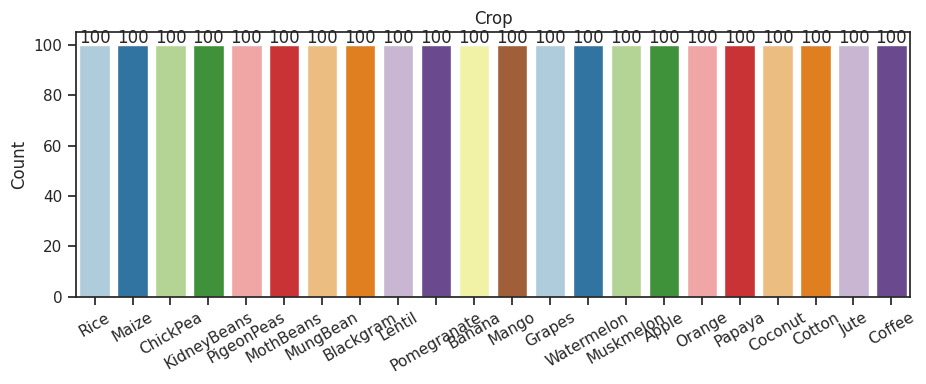

In [68]:
plot_counts(df, [target])

##### Observation: There are 22 different types of crops we have in the dataset and each type has 100 samples. We can safely say that the dataset is quite balanced. 

#### 4.1.2 Numerical Columns 

In [69]:
def dist_plots(data, feature_list):
    # number of columns for the subplots
    n_cols = 2
    # number of rows for the subplots
    n_rows = int(np.ceil(len(feature_list)/n_cols))

    fig = plt.figure(figsize=(16,4*n_rows))
    outer = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.3)

    for i in range(len(feature_list)):
        inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], wspace=0.1,hspace=0.1, height_ratios=(0.15,0.85))
        ax_box = plt.Subplot(fig, inner[0])
        sb.boxplot(data, x=feature_list[i], color='lightblue', ax = ax_box)
        ax_box.set_label('')
        fig.add_subplot(ax_box)

        mean_value = data[feature_list[i]].mean()
        median_value = data[feature_list[i]].median()

        ax_hist = plt.Subplot(fig, inner[1])
        sb.histplot(data=data, x=feature_list[i], ax=ax_hist, kde=True)
        ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2, label='Mean')
        ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')
        

        ax_hist.legend(loc='lower right', fontsize=10)
        skewness = data[feature_list[i]].skew()
        kurt = data[feature_list[i]].kurt()

        if skewness < 0:
            x = 0.25
        else:
            x = 0.95

        ax_hist.text(x, 0.85, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}", 
                     transform=ax_hist.transAxes, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'), fontsize=10)

        fig.add_subplot(ax_hist)

    plt.tight_layout()
    plt.show()
        
        
        
        
    

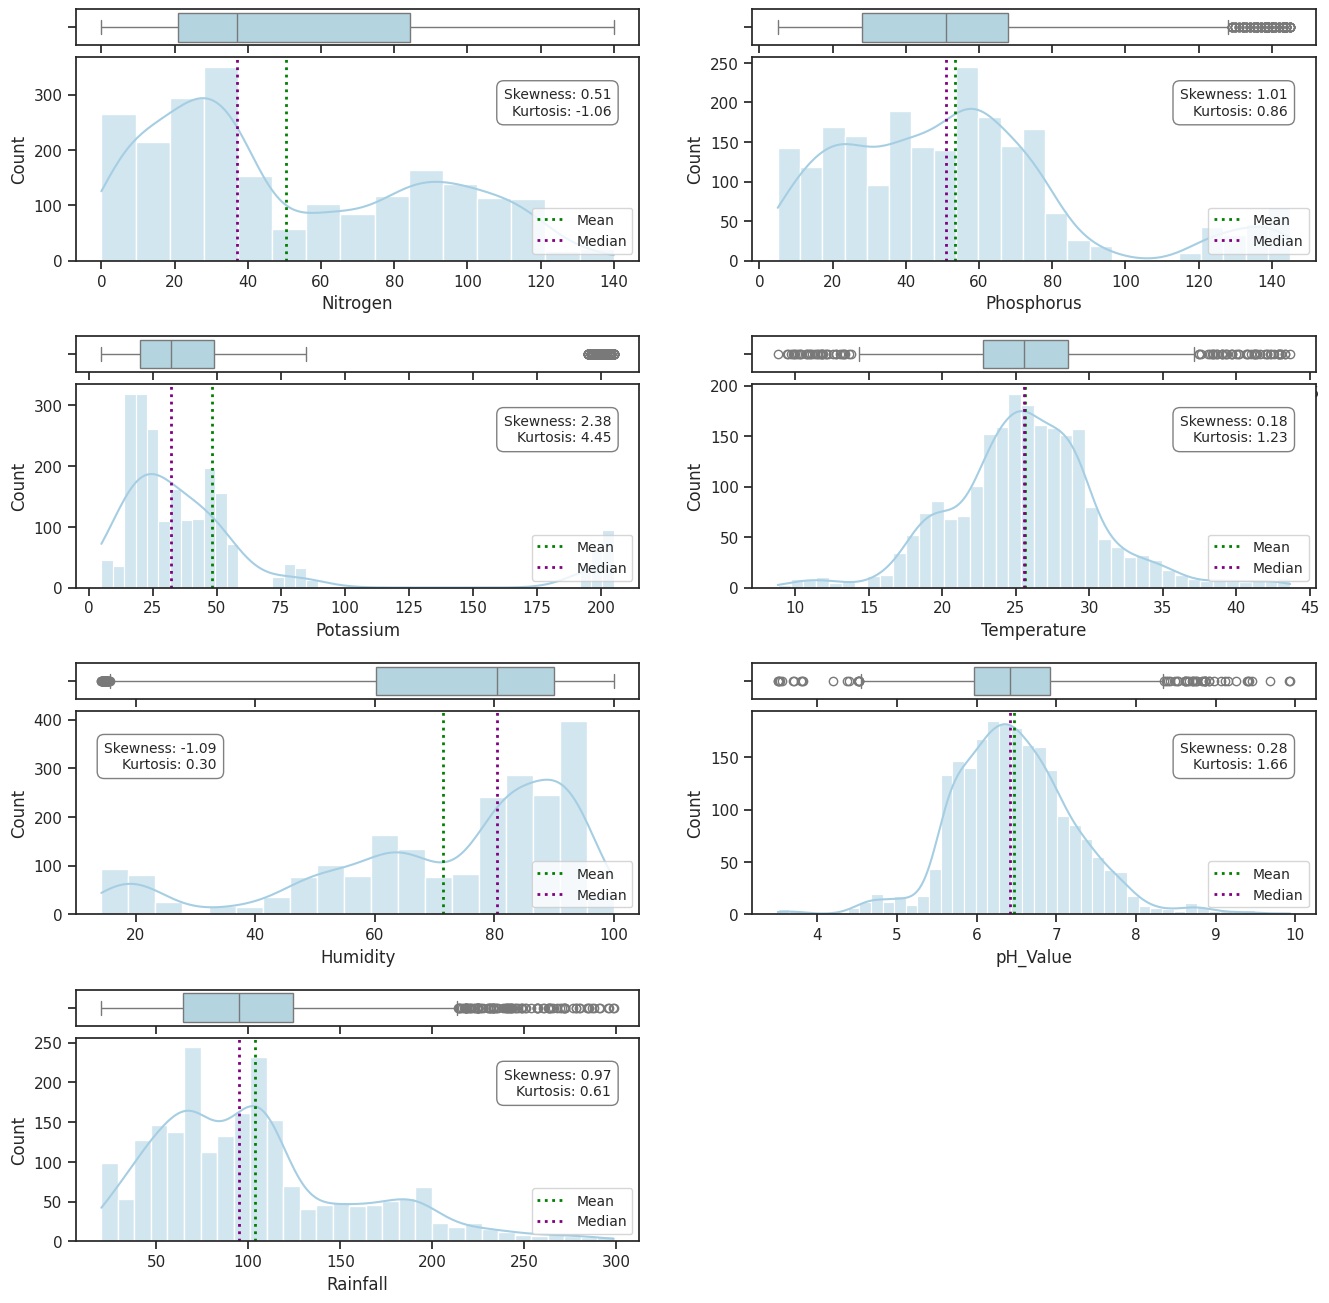

In [70]:
dist_plots(df, features)

##### Observations:
1. We have total 7 numeric features
2. Most of the features do not follow normal distribution
3. Some features are right and some features are left skewed.
4. They are not falling in the similar range, so we would need to apply scaling.

#### 4.2 Bivariate Analysis

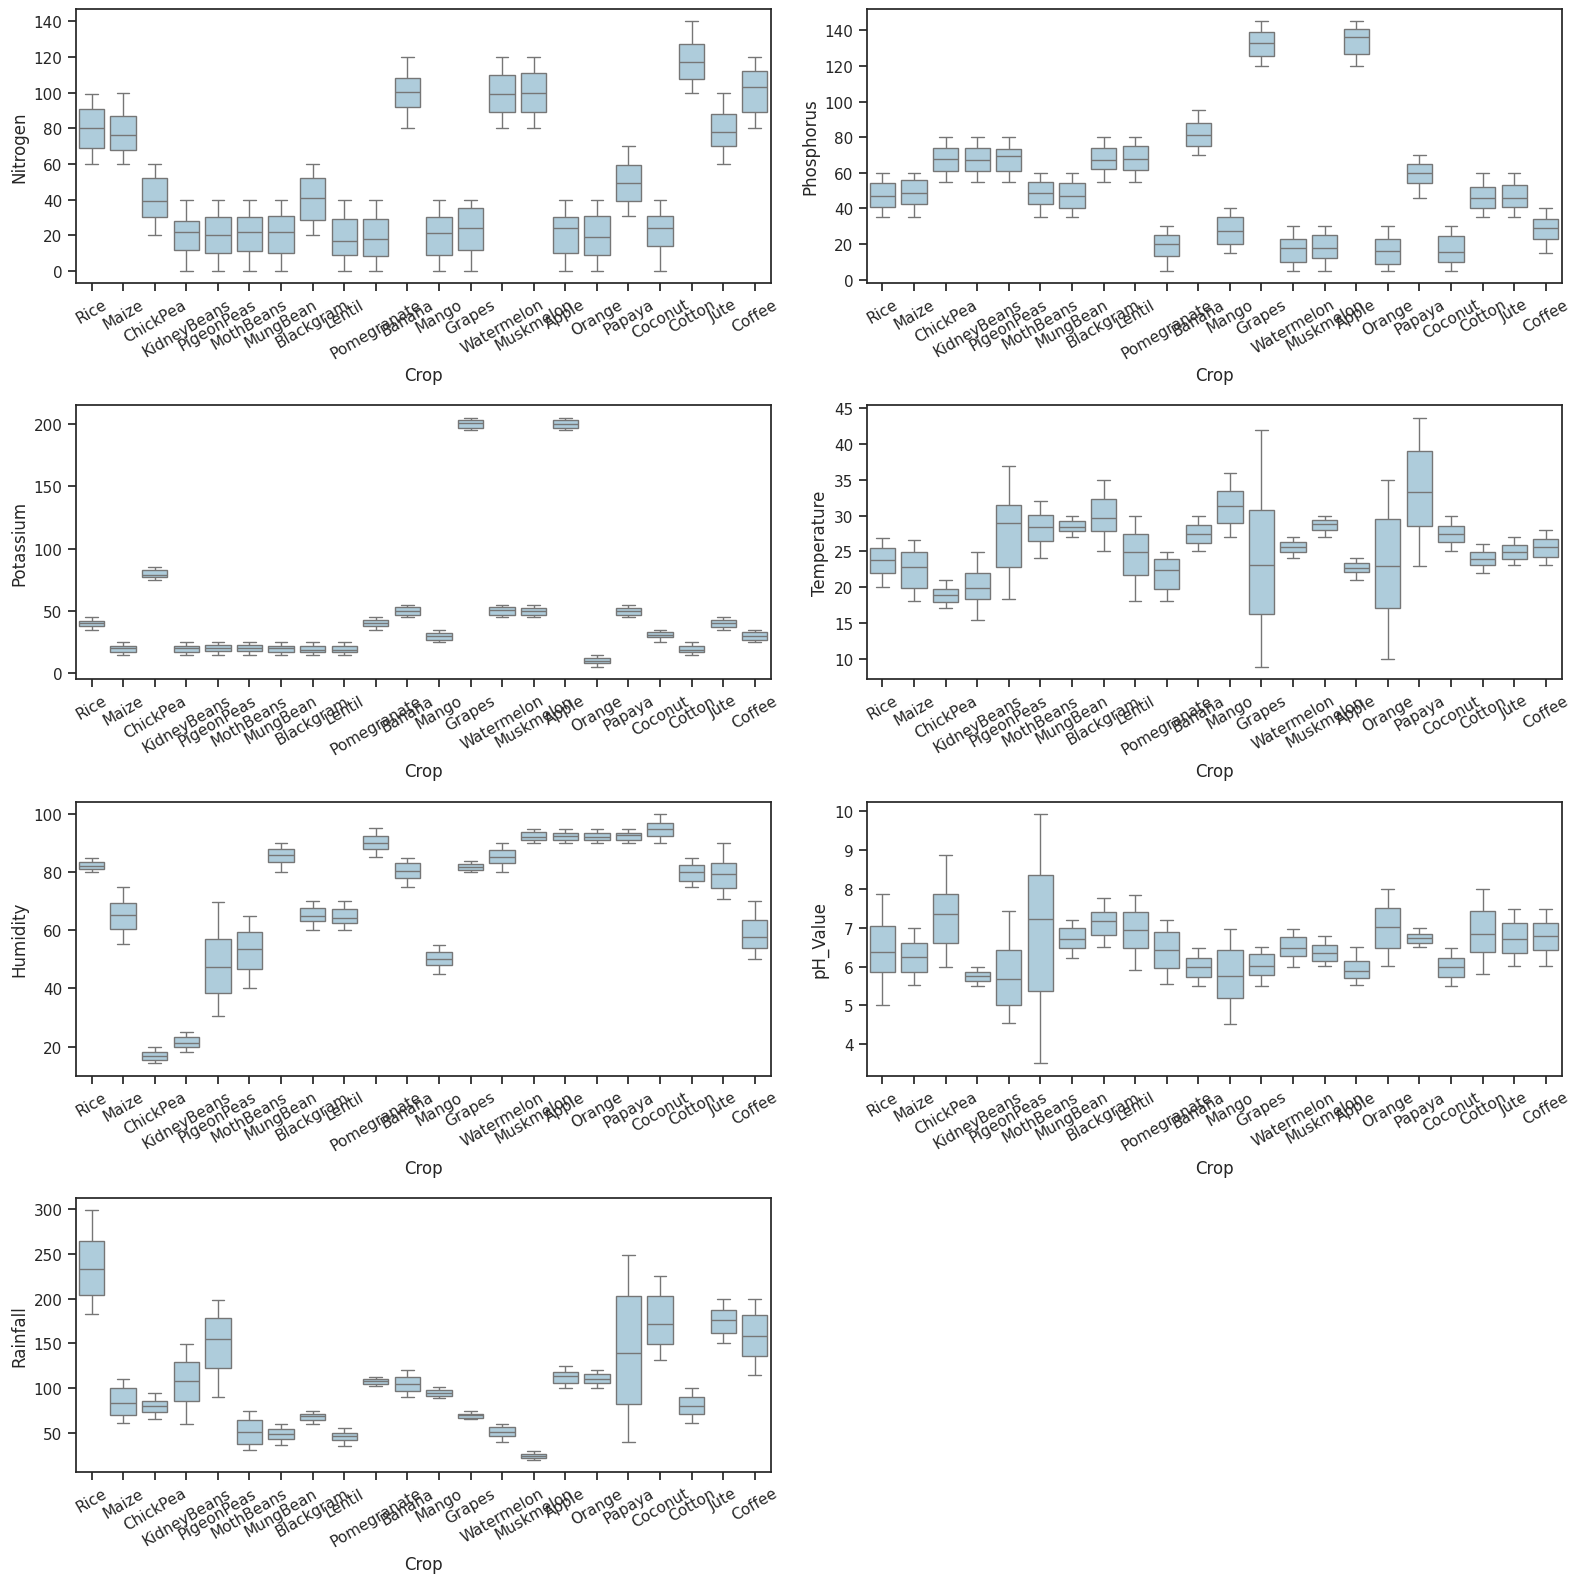

In [71]:
# number of columns of the subplots
n_cols = 2

# number of rows of the subplots
n_rows = int(np.ceil(len(features)/n_cols))

# add a figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
ax = axes.flatten()

for i,feature in enumerate(features):
    sb.boxplot(data=df, x=target, y=feature, ax=ax[i])
    ax[i].tick_params(axis='x', rotation=30)

# if number of features is odd then remove the empty subplot
if len(features) % 2 != 0:
    fig.delaxes(ax[-1])

plt.tight_layout()
plt.show(block=False)


##### Observations: The data shows all crops have different needs in terms of minerals and humidity. This also includes the rainfall and pH-value.

#### 4.3 Multi-variate Analysis

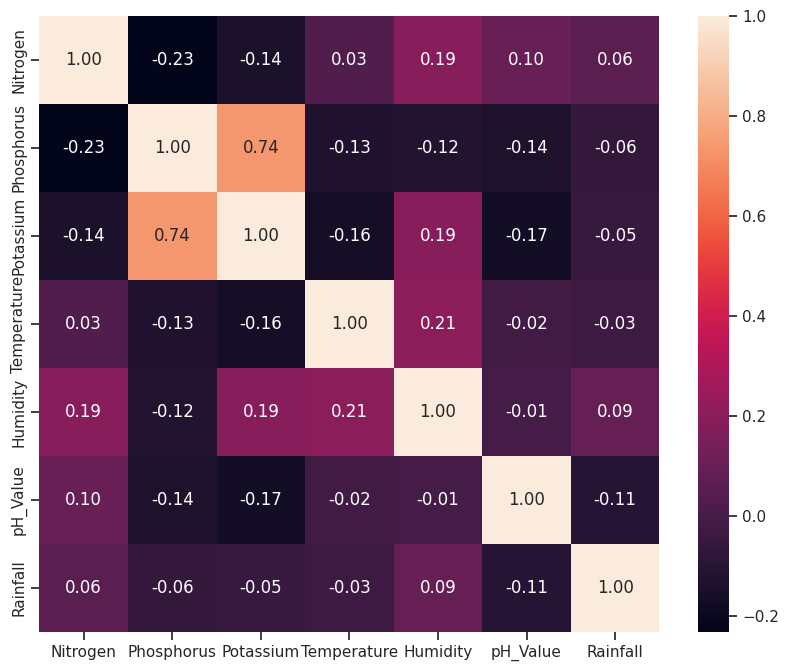

In [72]:
plt.figure(figsize=(10, 8))
sb.heatmap(data=df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

##### Observation: It shows that Potassium and Phosphorus have high correlation which may cause co-linearity. Such high correlation may negatively impact algorithms which works on assumption that all features are independent. 

## 5. Data Preparation
Since there aren't any null values, so we will only remove the outliers.

#### 5.1 Dropping Columns
We will drop Phosphorus as it's having high correlation with Potassium

In [73]:
df.drop(['Phosphorus'], axis = 1, inplace = True)
features = features.tolist()
features.remove('Phosphorus')
print(features)

['Nitrogen', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']


#### 5.2 Handling Outliers
We will handle the outliers using IQR method.

IQR = Q3 - Q1

Where, Q1 = 1st Quartile (25th Percentile) and Q3 = 3rd Quartile (75th Percentile)

Lower Bound = Q1 - 1.5 x IQR
Upper Bound = Q3 + 1.5 x IQR



In [74]:
# Calculate the 1st Quartile and 3rd Quartile for the selected features
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)

# Calculate the Interquartile Range(IQR) for the selected features
IQR = Q3 - Q1

# Define the Lower and Upper bound to identify the outliers for the selected features
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers for the selected features
outliers = (df[features] < lower_bound) | (df[features] > upper_bound)

# Remove outliers for the selected features, for that first extract non-outliers items
df_no_outliers = df[~outliers.any(axis=1)]

df_no_outliers.reset_index(inplace = True, drop = True)

# Display the cleaned dataframe's info
df_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     1768 non-null   int64  
 1   Potassium    1768 non-null   int64  
 2   Temperature  1768 non-null   float64
 3   Humidity     1768 non-null   float64
 4   pH_Value     1768 non-null   float64
 5   Rainfall     1768 non-null   float64
 6   Crop         1768 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 96.8+ KB


In [75]:
df_no_outliers[target].value_counts()

Crop
Banana         100
Lentil         100
Jute           100
Cotton         100
Muskmelon      100
Watermelon     100
Maize          100
Pomegranate    100
Coffee         100
Blackgram      100
MungBean       100
PigeonPeas     100
KidneyBeans    100
Mango           98
Coconut         85
Orange          83
MothBeans       58
ChickPea        58
Papaya          54
Rice            32
Name: count, dtype: int64

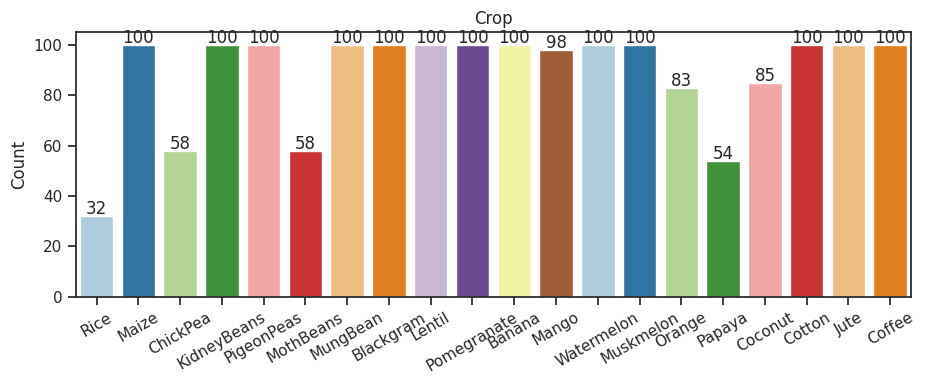

In [76]:
plot_counts(df_no_outliers, [target])

##### Observation: We need to pay extra attenstion to the performance score of Rice, ChickPea, MothBeans and Papaya as they might not have enough samples for the generalization

In [77]:
# Get unique values of the column from the first dataframe
unique_values_df1 = df[target].unique()

# Get unique values of the column from the second dataframe
unique_values_df2 = df_no_outliers[target].unique()

common_values = set(unique_values_df1) & set(unique_values_df2)
unique_values_only_in_df1 = set(unique_values_df1) - set(unique_values_df2)
unique_values_only_in_df2 = set(unique_values_df2) - set(unique_values_df1)

print("Common Values: ", common_values)
print("Df1 Unique Values:", unique_values_only_in_df1) 
print("Df2 Unique Values:", unique_values_only_in_df2)

Common Values:  {'MothBeans', 'Rice', 'Papaya', 'PigeonPeas', 'Maize', 'Pomegranate', 'Coconut', 'Lentil', 'Jute', 'Banana', 'Watermelon', 'Muskmelon', 'Orange', 'Mango', 'Coffee', 'Blackgram', 'MungBean', 'Cotton', 'ChickPea', 'KidneyBeans'}
Df1 Unique Values: {'Apple', 'Grapes'}
Df2 Unique Values: set()


##### Observation: Since we loose 2 crop types after removing the outliers, it's better to keep them. Hence we will continue with the raw dataset.

#### 5.3 Handling Skewness of Numeric Features
Skewed data can also affect the generalization performance of the model. If the training data contains a disproportionate number of extreme values, the model may learn from the training data but do not generlize well to new, unseen data. This can lead to poor performance when model is applied to real-world scenarios. In this section we will apply the methods to handle the skewness of the numerical features. 

In [79]:
from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import QuantileTransformer, StandardScaler

In [80]:
def transformation_method(data, feature):
    fig, axes = plt.subplots(2, 3, figsize = (12, 9))

    # flatten the axes array for easier indexing
    axes = axes.flatten()

    # Calculate skewness
    # Original distribution of the feature
    sb.histplot(data[feature], kde = True, bins = 30, color = 'skyblue', ax = axes[0])
    axes[0].set_title(f'Original {feature} Distribution \n (Skew: {data[feature].skew(): .5f})', fontsize = 10)
    axes[0].set_xlabel(feature, fontsize = 10)
    axes[0].set_ylabel('Frequency', fontsize = 10)

    # Log Transformed feature
    # Applying Log Transformation
    data['Log_' + feature] = np.log(data[feature])
    sb.histplot(data['Log_' + feature], kde = True, bins = 30, color = 'blue', ax = axes[1])
    axes[1].set_title(f"Log Transformed {feature} \n (Skew: {data['Log_' + feature].skew(): .5f})", fontsize = 10)
    axes[1].set_xlabel(f'Log of {feature}', fontsize = 10)
    axes[1].set_ylabel('Frequency', fontsize = 10)

    # Squared root transformed data
    # Applying square root transformation
    data['Square_' + feature] = np.sqrt(data[feature])
    sb.histplot(data['Square_' + feature], kde = True, bins = 30, color = 'orange', ax = axes[2])
    axes[2].set_title(f"Squared root Transformed {feature} \n (Skew: {data['Square_' + feature].skew(): .5f})", fontsize = 10)
    axes[2].set_xlabel(f'Squared root of {feature}', fontsize = 10)
    axes[2].set_ylabel('Frequency', fontsize = 10)

    # Boxcox Transformed feature
    # Applying Boxcox Transformation after checking all values are positive
    if (data[feature] <= 0).any():
        # Shift the values to make them positive
        shift_value = abs(data[feature].min()) + 1
        data[feature] += shift_value
        print(f"Values of {feature} shifted to make them positive")

    data['Boxcox_'+feature],_ = boxcox(data[feature])
    sb.histplot(data['Boxcox_'+feature], kde = True, bins = 30, color = 'red', ax = axes[3])
    axes[3].set_title(f"Boxcox Transformed {feature} \n (Skew: {data['Boxcox_'+feature].skew(): .5f})", fontsize = 10)
    axes[3].set_xlabel(f'Box-cox of {feature}', fontsize = 10)
    axes[3].set_ylabel('Frequency', fontsize = 10)

    # Yeo-johnson Transformed feature
    # Applying Yeojohnson Transformation
    data['Yeo_'+feature], _ = yeojohnson(data[feature])
    sb.histplot(data['Yeo_'+feature], kde = True, bins = 30, color = 'purple', ax = axes[4])
    axes[4].set_title(f"Yeojohnson Transformed {feature} \n (Skew: {data['Yeo_'+feature].skew(): .5f})", fontsize = 10)
    axes[4].set_xlabel(f"Yeojohnson Transformed {feature}", fontsize = 10)
    axes[4].set_ylabel('Frequency', fontsize = 10)

    # Quantile Transformed feature (Normal Distribution)
    # Applying Quantile Transformation
    quantile_transformer = QuantileTransformer(output_distribution='normal', random_state = 0)
    data['Quantile_' + feature] = quantile_transformer.fit_transform(data[feature].values.reshape(-1,1)).flatten()
    sb.histplot(data['Quantile_' + feature], kde = True, bins = 30, color = 'green', ax = axes[5])
    axes[5].set_title(f"Quantile Transformed {feature} \n (Skew: {data['Quantile_' + feature].skew(): .5f})", fontsize = 10)
    axes[5].set_xlabel(f"Quantile Transformed {feature}", fontsize = 10)
    axes[5].set_ylabel('Frequency', fontsize = 10)

    plt.tight_layout()
    plt.show()
    
    

In [81]:
df_copy = df.copy()

Values of Nitrogen shifted to make them positive


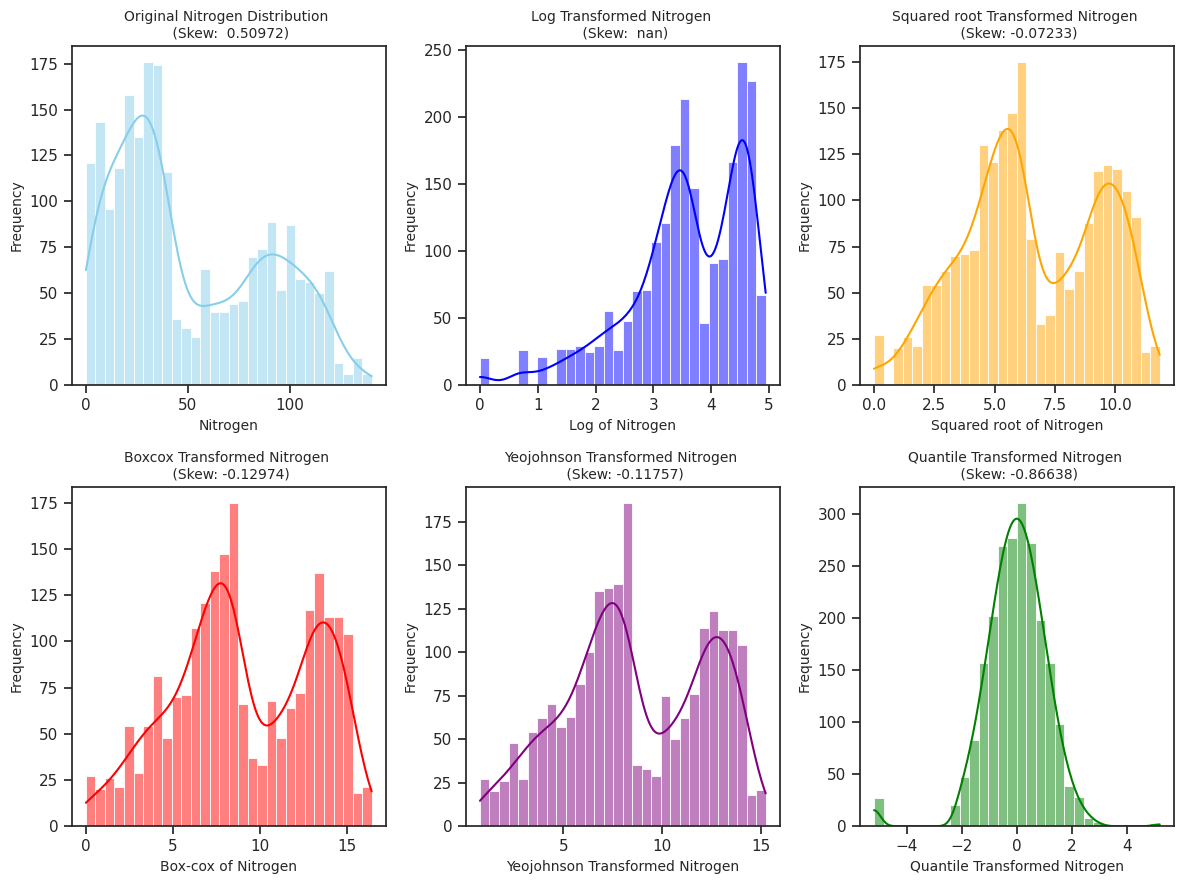

In [82]:
transformation_method(df_copy, features[0])

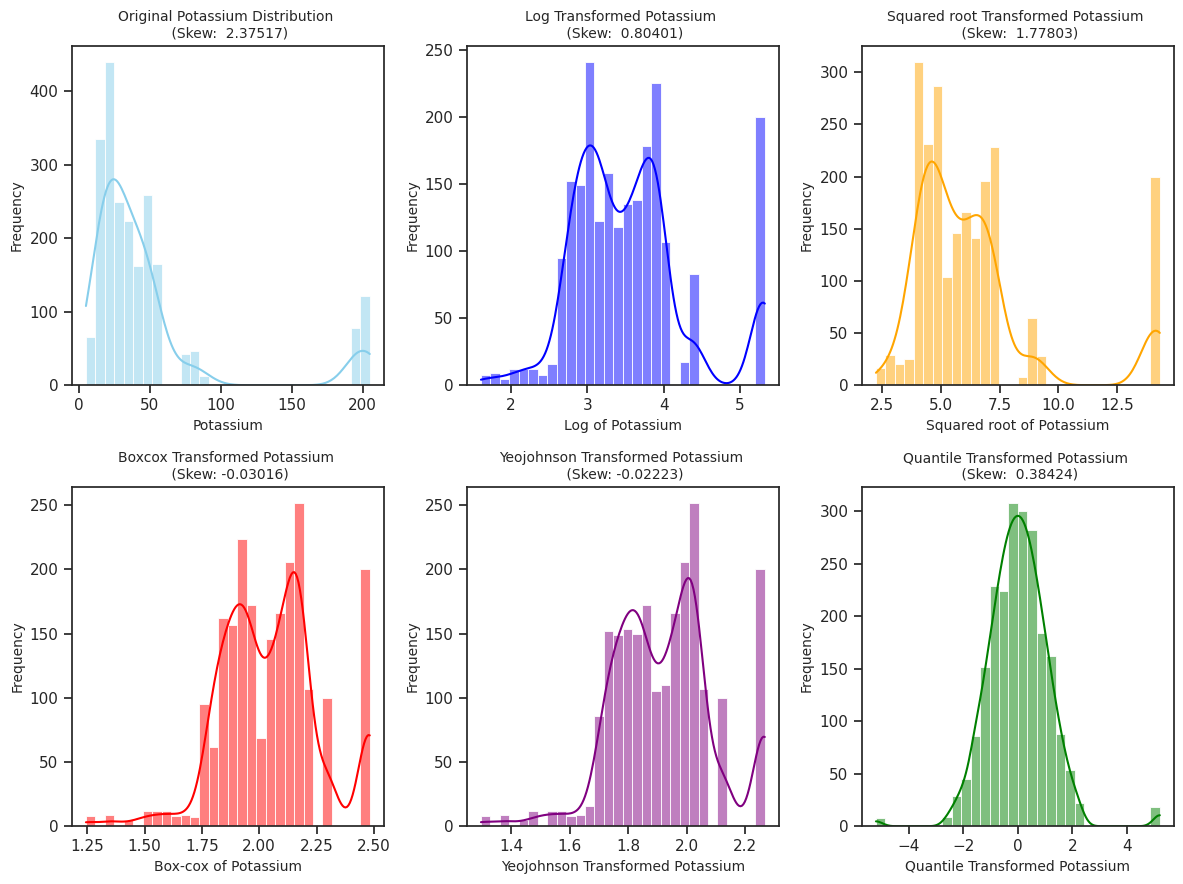

In [83]:
transformation_method(df_copy, features[1])

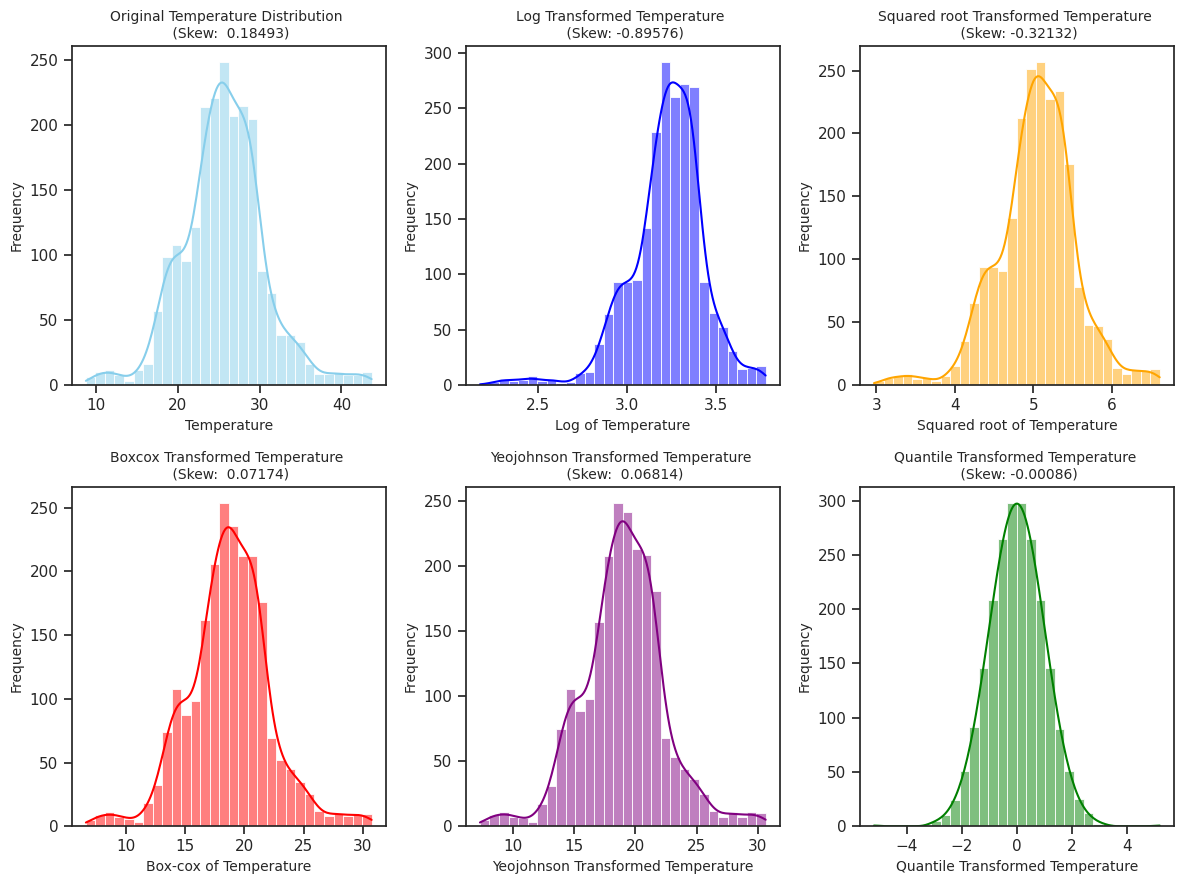

In [84]:
transformation_method(df_copy, features[2])

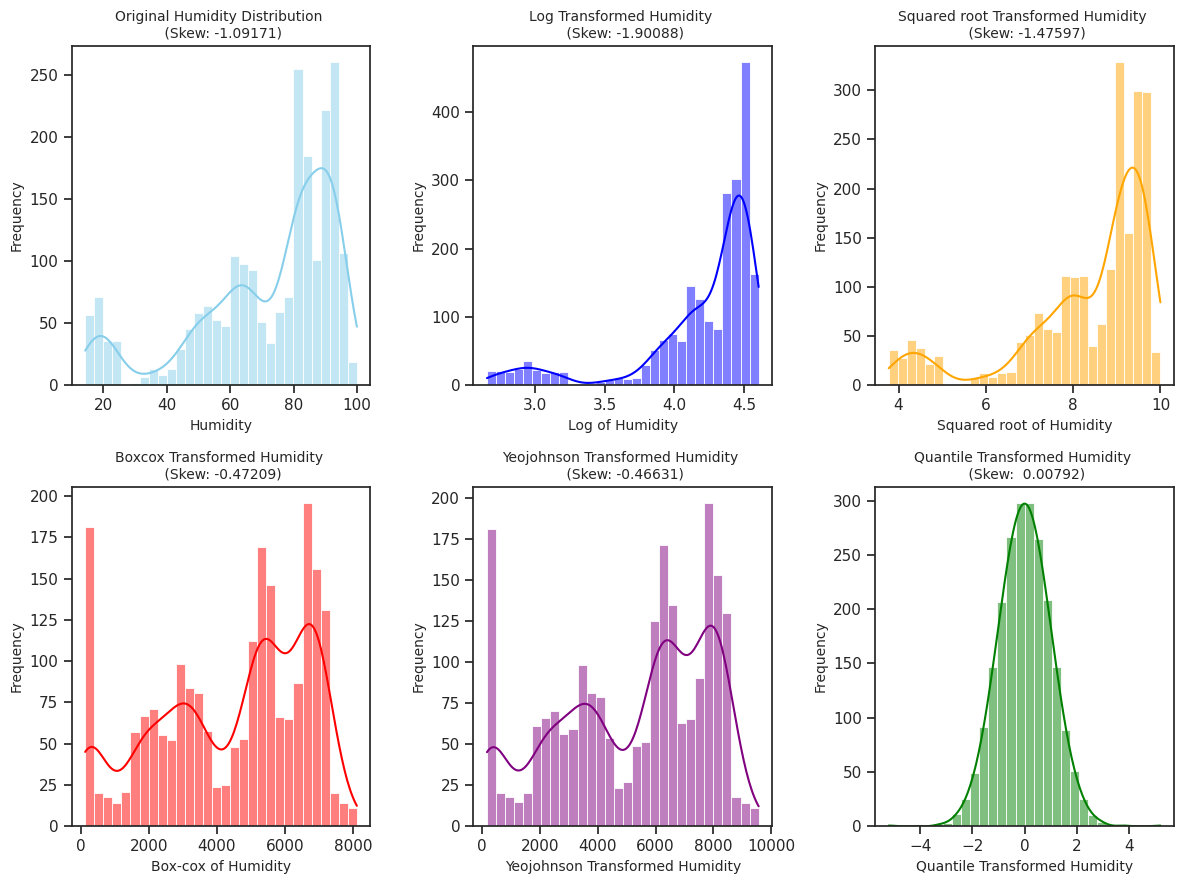

In [85]:
transformation_method(df_copy, features[3])

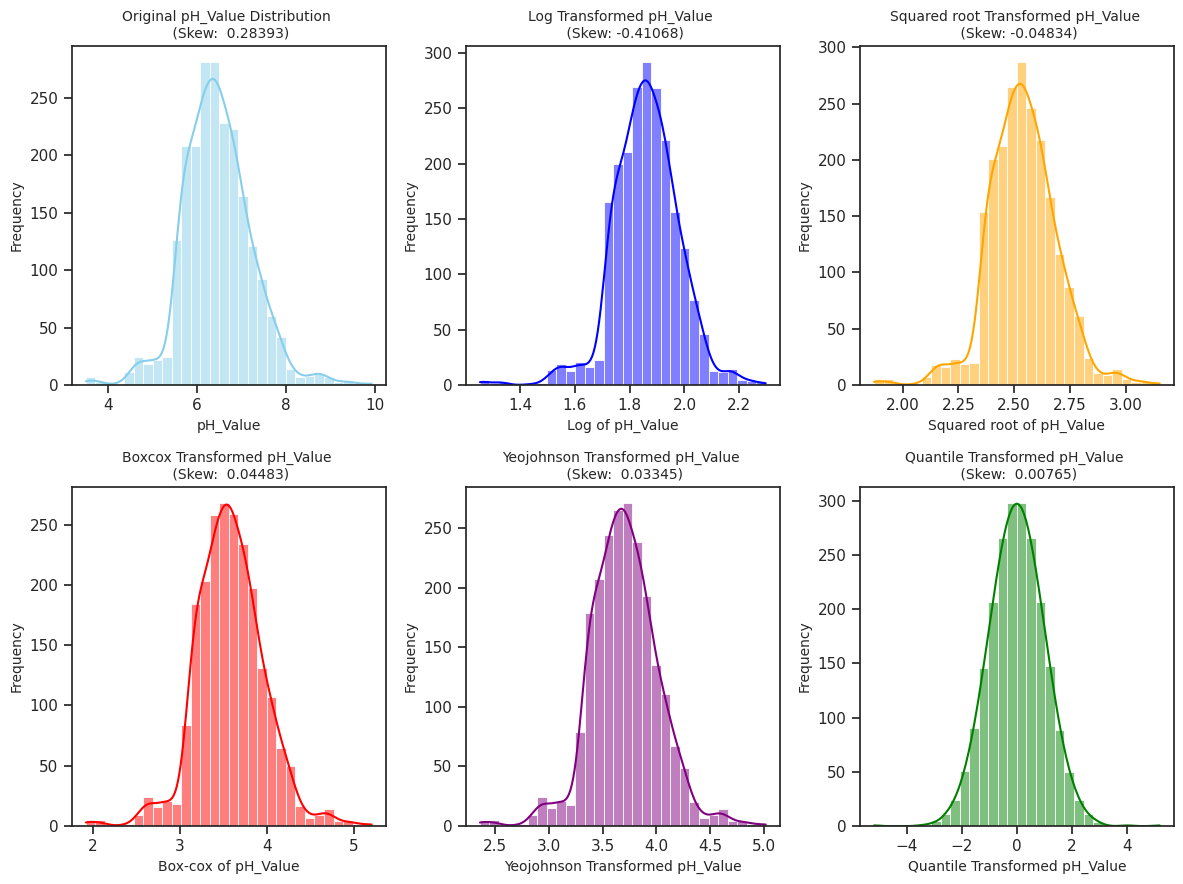

In [86]:
transformation_method(df_copy, features[4])

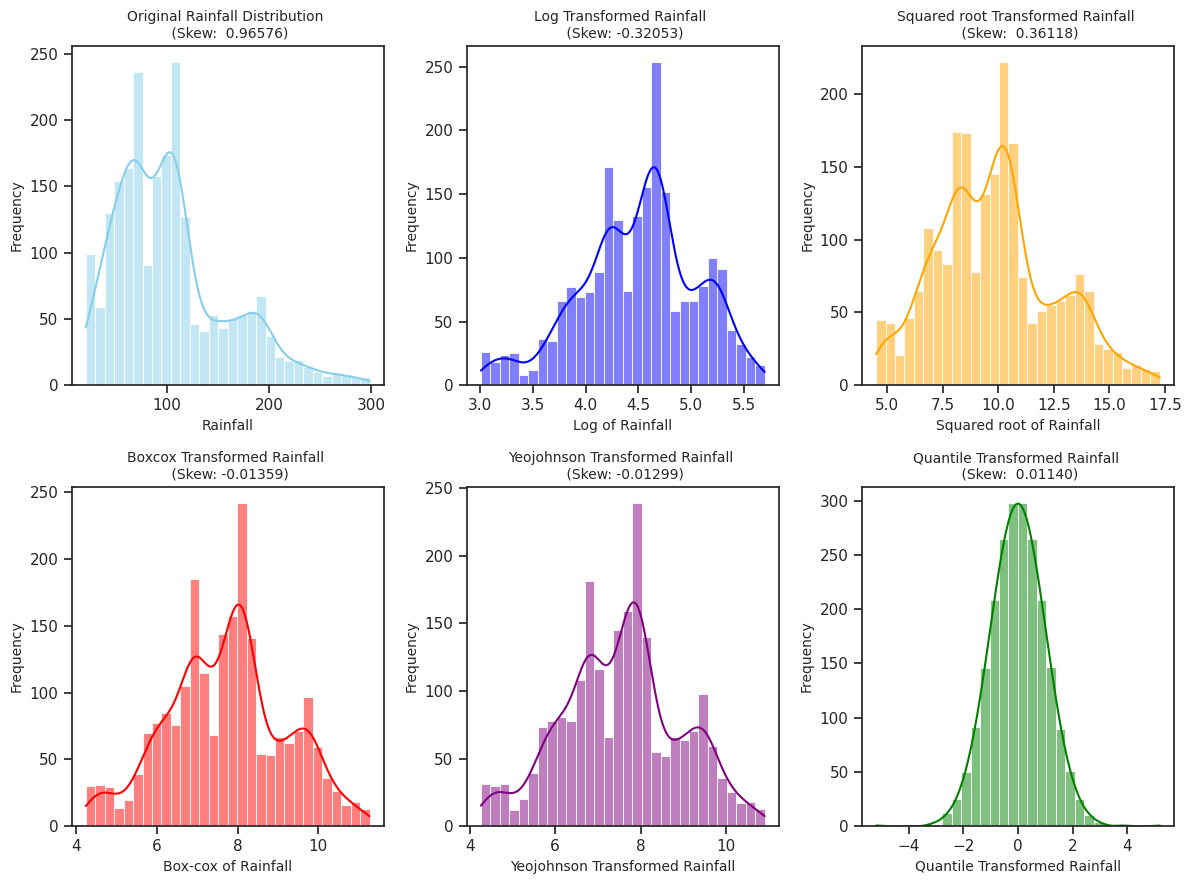

In [87]:
transformation_method(df_copy, features[5])

#### 5.4 Transform Dataset

In [94]:
def transform_dataset(df, target, num_features):
    # Encode the Target column
    lbl_encoder = LabelEncoder()
    df[target + '_Encoded'] = lbl_encoder.fit_transform(df[target])

    # Assign features and lables
    x = df.drop([target, target + '_Encoded'], axis = 1)
    y = df[target + '_Encoded']

    # Split the dataset into test and train sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)
    

    # Access the encoded classes
    # Print the mapping (index corresponds to encoded value, value corresponds to original value)
    for i, label in enumerate(lbl_encoder.classes_):
        print(f"{i}: '{label}',")

    # Standardization and Transformation of features
    std_scaler = StandardScaler()
    
    std_scaler.fit(x_train)

    # Transform train and test data using fitted transformers
    x_train = std_scaler.transform(x_train)
    x_test = std_scaler.transform(x_test)
    
    # save scaler object for future use for unseen data
    with open('Scaler.pkl', 'wb') as file:
        pickle.dump(std_scaler, file)
    
    return x_train, x_test, y_train, y_test
    

In [95]:
df

,Nitrogen,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Crop_Encoded
0,90,43,20.880,82.003,6.503,202.936,Rice,20
1,85,41,21.770,80.320,7.038,226.656,Rice,20
2,60,44,23.004,82.321,7.840,263.964,Rice,20
3,74,40,26.491,80.158,6.980,242.864,Rice,20
4,78,42,20.130,81.605,7.628,262.717,Rice,20
...,...,...,...,...,...,...,...,...
2195,107,32,26.775,66.413,6.780,177.775,Coffee,5
2196,99,27,27.417,56.636,6.087,127.925,Coffee,5
2197,118,30,24.132,67.225,6.363,173.323,Coffee,5
2198,117,34,26.272,52.127,6.759,127.175,Coffee,5


In [96]:
x_train, x_test, y_train, y_test = transform_dataset(df, target, features)
x_test[0]

0: 'Apple',
1: 'Banana',
2: 'Blackgram',
3: 'ChickPea',
4: 'Coconut',
5: 'Coffee',
6: 'Cotton',
7: 'Grapes',
8: 'Jute',
9: 'KidneyBeans',
10: 'Lentil',
11: 'Maize',
12: 'Mango',
13: 'MothBeans',
14: 'MungBean',
15: 'Muskmelon',
16: 'Orange',
17: 'Papaya',
18: 'PigeonPeas',
19: 'Pomegranate',
20: 'Rice',
21: 'Watermelon',


array([ 0.60283828, -0.53745978, -1.13342556, -0.61755002,  0.16537031,
       -0.78086812])

## 6. Model Comparison


#### 6.1 Comparing Different Algorithms
In this section we will compare non-linear and ensemble algorithms using k-fold cross validation and then decide on the candidate algorithm for hyperparameter tuning based on the accuracy metric.

In [42]:
def model_comparison(x, y, models):
    '''
        This function takes x, y and models and applies k-fold cross validation
        to each algorithm in models list with x and y training set.  Displays the
        mean and standard deviation of accuracy, precision, recall, f1 score in 
        tabular and boxplots.

        ---
        ### Parameters
        - x <array>: Feature Values
        - y <array>: Target Values
        - models <list>: List of models to be evaulated
        ---
    '''

    names = []
    scoring = ['accuracy']

    # Create a data frame to store different metric values for each algorithm
    df_results = pd.DataFrame(columns=['Algorithm', 'Acc Mean', 'Acc STD'])

    results_acc = [] # List of accuracy scores of each fold of each algorithm

    for name, model in models:
        names.append(name)
        kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 101)
        result = cross_validate(model, x, y, cv = kfold, scoring = scoring)

        # mean and standard deviation of the accuracy score of the algorithm
        acc_mean = result['test_accuracy'].mean()
        acc_std = result['test_accuracy'].std()

        # Create row of the results
        df_result_row = {'Algorithm': name, 'Acc Mean': acc_mean, 'Acc STD': acc_std}

        # Add row to the results data frame
        df_results = pd.concat([df_results, pd.DataFrame([df_result_row])], ignore_index = True)

        results_acc.append(result['test_accuracy'])

    df_results = df_results.set_index('Algorithm')
    pd.set_option('display.float_format', lambda x : '%.3f' % x)

    # print the result dataframe
    print(df_results)

    # Display the overall results on boxplot
    width = (len(models)*2)
    plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(width, 6))
    fig, ax = plot_objects
    
    ax.boxplot(results_acc)
    ax.set_title('Accuracy', fontsize=14)
    ax.set_xticklabels(names, rotation=30)
    plt.tight_layout()
    plt.show()
    
        
        

##### 6.1.1 Ensemble Methods

           Acc Mean  Acc STD
Algorithm                   
RFC           0.993    0.004
ABC           0.182    0.000
GBC           0.990    0.006


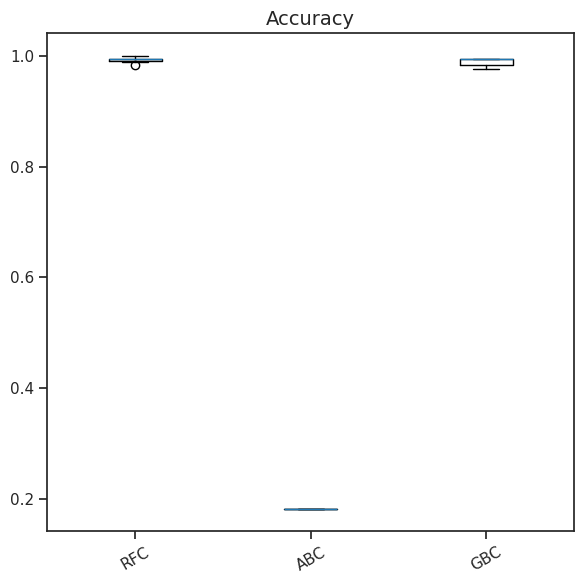

In [44]:
ens_models = []
ens_models.append(('RFC', RandomForestClassifier()))
ens_models.append(('ABC', AdaBoostClassifier()))
ens_models.append(('GBC', GradientBoostingClassifier()))

model_comparison(x_train, y_train, ens_models)

##### 6.1.2 Non-linear Methods

           Acc Mean  Acc STD
Algorithm                   
SVC           0.973    0.008
DTC           0.981    0.007
KNC           0.960    0.004
GNB           0.993    0.004
XGB           0.987    0.006


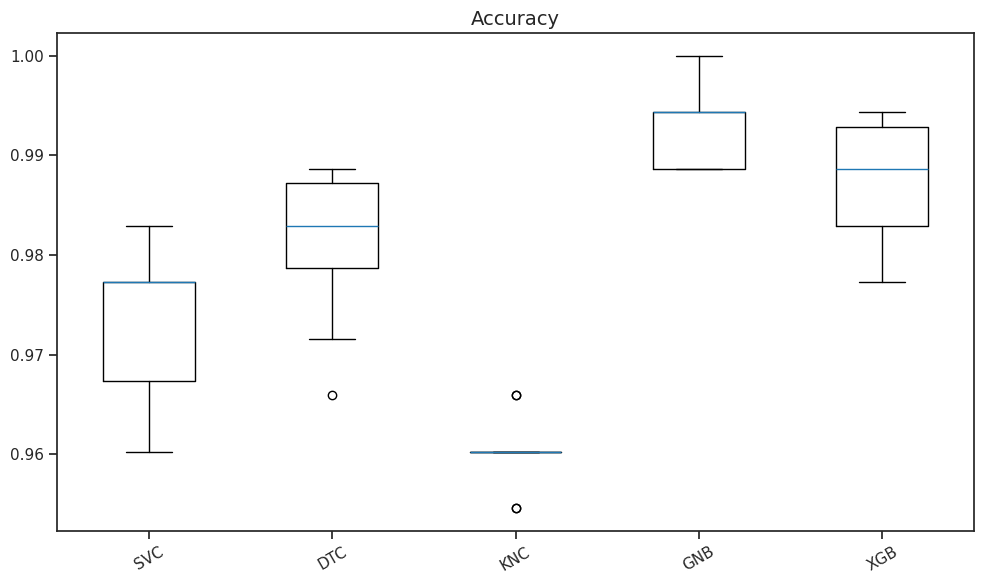

In [45]:
nl_models = []
nl_models.append(('SVC', SVC()))
nl_models.append(('DTC', DecisionTreeClassifier()))
nl_models.append(('KNC', KNeighborsClassifier()))
nl_models.append(('GNB', GaussianNB()))
nl_models.append(('XGB', XGBClassifier()))

model_comparison(x_train, y_train, nl_models)

## 7. Finalizing Model
From the above metrics it's clear that RandomForestClassifier has high accuracy as compared to others. So we should take it as our final model for training and testing

In [46]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

predictions = rfc.predict(x_test)

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      0.95      0.97        20
           9       1.00      1.00      1.00        20
          10       0.91      1.00      0.95        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      0.90      0.95        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

In [48]:
print(confusion_matrix(y_test, predictions))

[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

## 8. Save the Model

In [49]:


model_pkl_file = "crop_recommendation.pkl"
with open(model_pkl_file, 'wb') as file:
    pickle.dump(rfc, file)